# Team 13: Analyzing the Impact of Global Events on Stock Market Performance

## Introduction

The project assess the stock market's response to two major global events: the Russia-Ukraine war and the COVID-19 pandemic. Our methodology combines traditional stock performance analysis with machine learning-driven volatility detection, providing a comprehensive view of market behavior during times of crisis. We focus on multiple hypotheses while examining the effects on sectors such as defense, technology, healthcare, and energy, as well as major NYSE stock indices. Visualizations like event study line plots and cumulative abnormal returns (CAR) plots help us identify immediate shifts and abnormal returns in specific sectors and indices, with a closer look at the defense sector’s reaction to geopolitical tensions and broader sectoral responses during the pandemic.

Github Link: https://github.com/cs418-fa24/project-check-in-team-13/blob/main/DataScienceProjectNov7.ipynb

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
#### Using yfinance, we download the historical stock data for the selected companies and major indices, covering the period from January 2019 to November 2024. The tickers for these companies and indices are specified beforehand.

The selected tickers include:
- 5 companies from the Defense sector (e.g., Lockheed Martin, Raytheon Technologies).
- 5 companies from the Tech sector (e.g., Apple, Microsoft).
- 5 companies from the Healthcare sector (e.g., Johnson & Johnson, Pfizer).
- 5 companies from the Energy sector (e.g., ExxonMobil, Chevron).
- 4 major indices: S&P 500, NASDAQ, Dow Jones, and VIX.

In [ ]:
# tickers
defense_tickers = ["LMT", "RTX", "GD", "NOC"]
tech_tickers = ["AAPL", "MSFT", "GOOGL", "NVDA", "META"]
healthcare_tickers = ["JNJ", "PFE", "MRK", "ABBV", "UNH"]
energy_tickers = ["XOM", "CVX", "COP", "SLB", "BP"]
index_tickers = ["^GSPC", "^IXIC", "^DJI", "^VIX"]

# Combining all tickers
all_tickers = defense_tickers + tech_tickers + healthcare_tickers + energy_tickers + index_tickers

data = yf.download(all_tickers, start="2019-01-01", end="2024-11-01")

[*********************100%***********************]  23 of 23 completed


### Data Cleaning

We clean the data by:
1. Extracting the "Adjusted Close" prices for each company, as this reflects stock value after adjustments for dividends and stock splits.
2. Dropping columns with missing values to ensure data consistency.
3. Optionally, we normalize the data, so each stock starts at 100, making it easier to compare the performance of different stocks.

In [ ]:
# Preprocessing data
close_prices = data['Adj Close'].dropna(axis=1)
print(close_prices.head()) 


normalized_prices = close_prices / close_prices.iloc[0] * 100

Ticker                          AAPL       ABBV         BP        COP  \
Date                                                                    
2019-01-02 00:00:00+00:00  37.750088  68.155128  28.183317  51.862991   
2019-01-03 00:00:00+00:00  33.989891  65.909508  28.343990  50.881065   
2019-01-04 00:00:00+00:00  35.440910  68.032913  29.234983  52.165760   
2019-01-07 00:00:00+00:00  35.362022  69.025864  29.329926  51.936642   
2019-01-08 00:00:00+00:00  36.036129  69.346672  29.234983  52.632191   

Ticker                           CVX          GD      GOOGL         JNJ  \
Date                                                                      
2019-01-02 00:00:00+00:00  86.034645  136.239044  52.603748  109.023010   
2019-01-03 00:00:00+00:00  84.386833  132.868988  51.146851  107.290611   
2019-01-04 00:00:00+00:00  86.135674  136.680878  53.770355  109.091301   
2019-01-07 00:00:00+00:00  87.254921  137.443222  53.663120  108.391495   
2019-01-08 00:00:00+00:00  86.874054  

#### Visualization
In this step, we visualize the performance of the stocks over time:
1. Plot the normalized prices of companies in the *Defense sector* to observe trends and major fluctuations.
2. Repeat for other sectors (Tech, Healthcare, Energy) to compare how each industry has been affected by external factors.
3. Use matplotlib to plot time series data, highlighting significant periods such as the Russia-Ukraine war and COVID-19 pandemic.

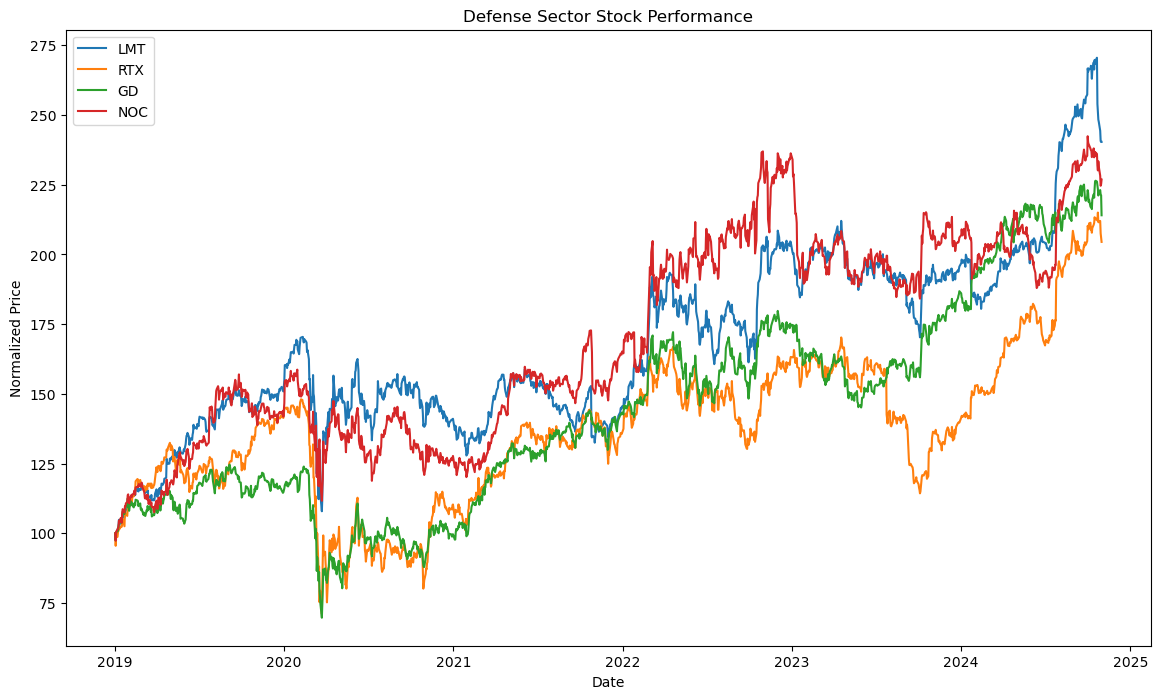

In [16]:
plt.figure(figsize=(14, 8))
for ticker in defense_tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)
plt.title("Defense Sector Stock Performance")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

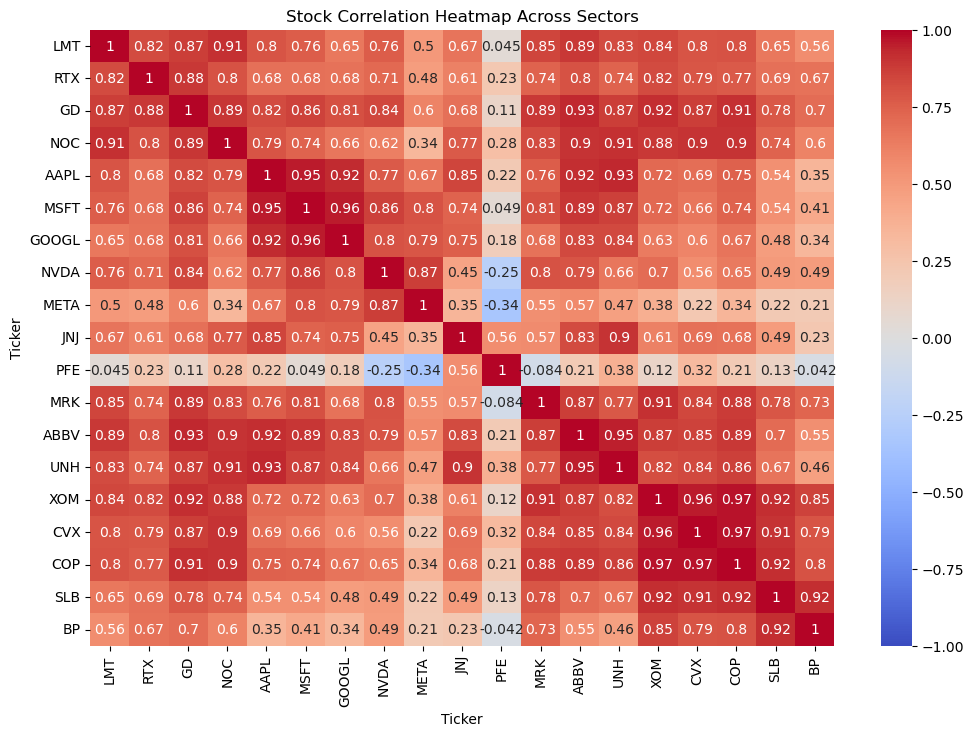

In [ ]:
# Computing correlation matrix 
sector_data = normalized_prices[defense_tickers + tech_tickers + healthcare_tickers + energy_tickers]
correlation_matrix = sector_data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Stock Correlation Heatmap Across Sectors")
plt.show()

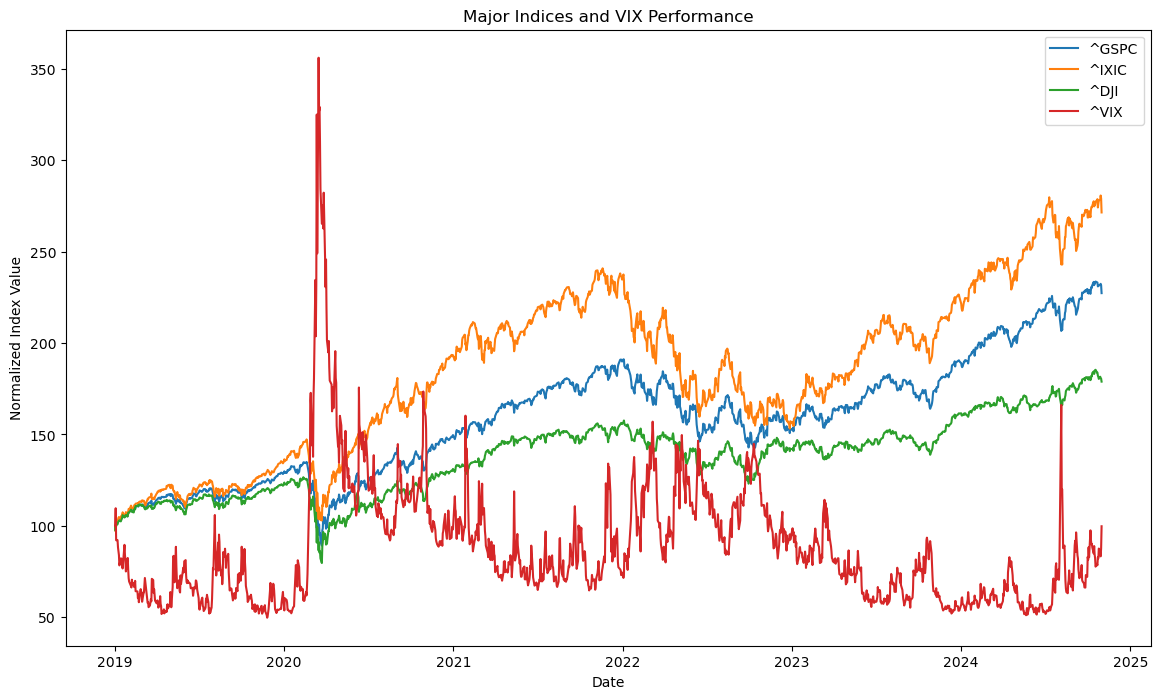

In [18]:
# Plot S&P 500, NASDAQ, Dow Jones, and VIX
plt.figure(figsize=(14, 8))
for ticker in index_tickers:
    plt.plot(normalized_prices.index, normalized_prices[ticker], label=ticker)
plt.title("Major Indices and VIX Performance")
plt.xlabel("Date")
plt.ylabel("Normalized Index Value")
plt.legend()
plt.show()

### Hypothesis 1: Defense Sector Stocks are Positively Impacted by Geopolitical Tensions

#### Visualizations:
##### Event Study Line Plot:

<b>Plot:</b> A time-series line plot for defense stocks around key geopolitical events, especially during the onset of the Russia-Ukraine conflict.This helps identify if there are notable price jumps or trends immediately after significant geopolitical events.

In [19]:
#obtaining the data of the important events related to the russia ukraine war

events = pd.DataFrame({
    "Date": [
        "2021-03-01",
        "2021-09-10",
        "2022-02-24",
        "2022-03-02",
        "2022-04-02",
        "2022-05-16",
        "2022-09-06",
        "2022-11-11",
        "2023-06-08",
        "2023-09-22",
        "2024-02-09",
        "2024-05-31",
        "2024-07-05",
        "2024-10-01",
        "2024-11-03"
    ],
    "Event": [
        "Russia builds up near Ukraine.",
        "Russia-Belarus military exercises.",
        "Russia invades.",
        "Russia takes Kherson.",
        "Ukraine retakes Bucha.",
        "Mariupol surrenders to Russia.",
        "Ukraine takes back Kharkiv.",
        "Russia leaves Kherson.",
        "Ukraine counteroffensive begins.",
        "Missile hits Sevastopol base.",
        "New military head in Ukraine.",
        "EU restricts Russian grain.",
        "Russian attacks on civilians.",
        "Putin promotes Dyumin.",
        "Ukraine stops Russian offensive."
    ]
})

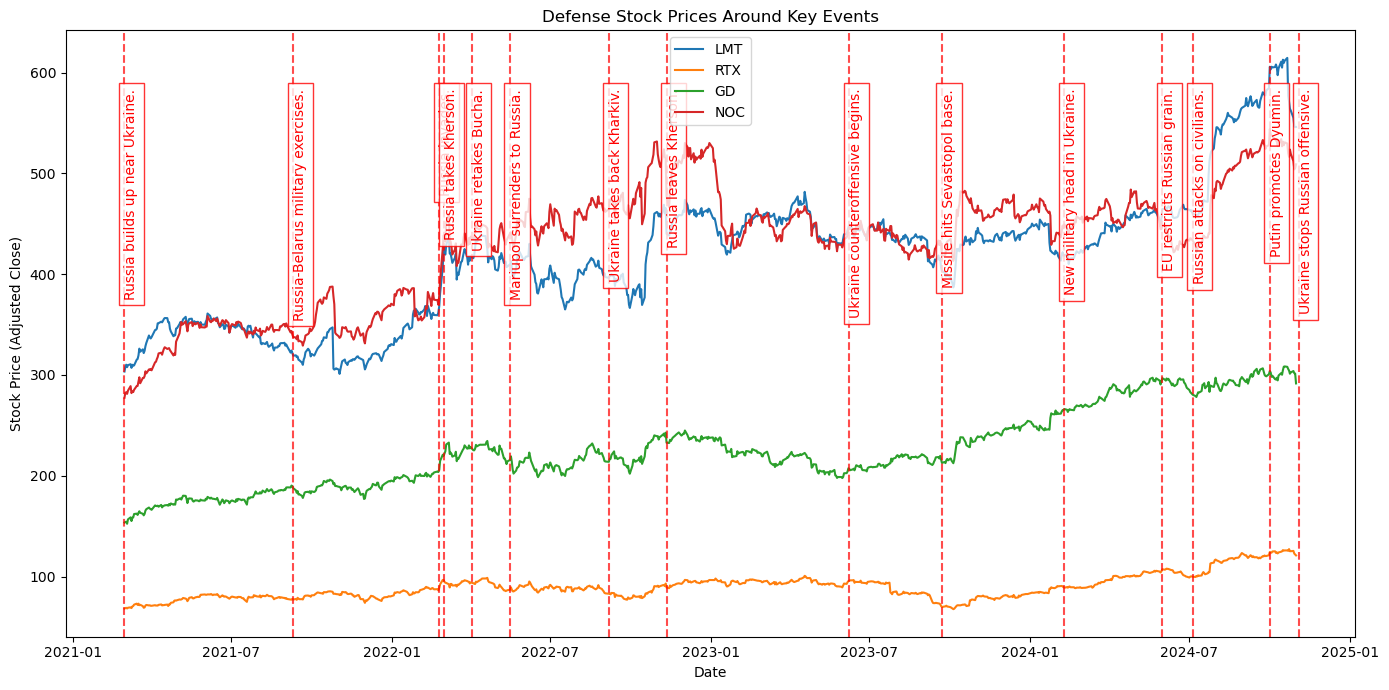

In [20]:
existing_defense_tickers = [ticker for ticker in defense_tickers if ticker in close_prices.columns]
defenseData = close_prices[existing_defense_tickers]

events['Date'] = pd.to_datetime(events['Date']).dt.tz_localize(None)

defenseData.index = pd.to_datetime(defenseData.index).tz_localize(None)


min_event_date = events['Date'].min()
max_event_date = events['Date'].max()



defenseData = defenseData[(defenseData.index >= min_event_date) & (defenseData.index <= max_event_date)]

# Plotting
plt.figure(figsize=(14, 7))

# Plot each defense stock price
for ticker in existing_defense_tickers:
    plt.plot(defenseData.index, defenseData[ticker], label=ticker)

# Mark events on the plot
for _, event in events.iterrows():
    plt.axvline(event['Date'], color='red', linestyle='--', alpha=0.7)
    # Annotate the event with better visibility
    plt.text(event['Date'], defenseData.max().max() * 0.95, event['Event'],
             rotation=90, verticalalignment='top', color='red', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

# Add labels, title, and legend
plt.title('Defense Stock Prices Around Key Events')
plt.xlabel('Date')
plt.ylabel('Stock Price (Adjusted Close)')
plt.legend()
plt.tight_layout()
plt.show()

#### Cumulative Abnormal Returns (CAR) Plot:

<b>Plot:</b> Calculate and plot cumulative abnormal returns for defense stocks around event dates.
Purpose: Show if defense stocks experience abnormal returns in response to geopolitical events.

Date
2019-01-02 00:00:00+00:00         NaN
2019-01-03 00:00:00+00:00   -0.005379
2019-01-04 00:00:00+00:00   -0.008933
2019-01-07 00:00:00+00:00   -0.009852
2019-01-08 00:00:00+00:00   -0.012220
dtype: float64


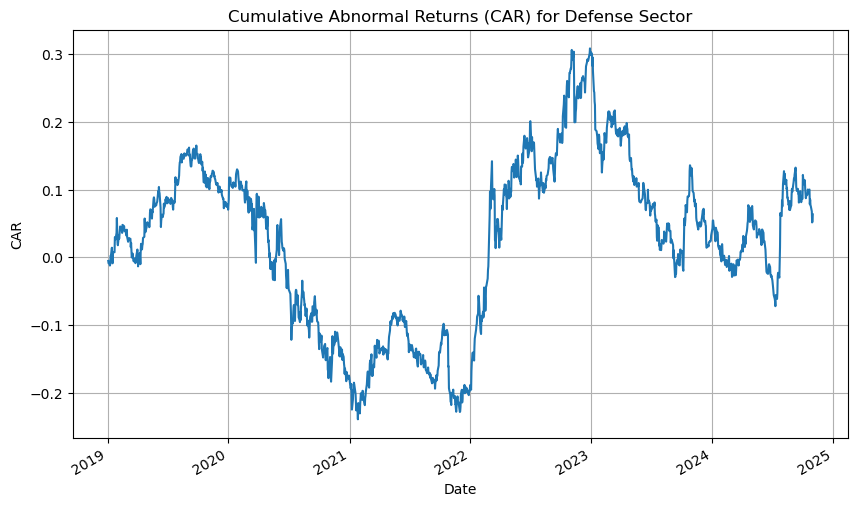

In [21]:
returns = close_prices.pct_change()
defense_returns = returns[defense_tickers].mean(axis=1)
benchmark_returns = returns["^GSPC"]
abnormal_returns = defense_returns - benchmark_returns
CAR = abnormal_returns.cumsum()
print(CAR.head())
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
CAR.plot(title="Cumulative Abnormal Returns (CAR) for Defense Sector")
plt.xlabel("Date")
plt.ylabel("CAR")
plt.grid()
plt.show()

### Observations: Defense Sector Stocks are Positively Impacted by Geopolitical Tensions

#### <b>1. Event Study Line Plot Observations</b>
The first plot gives us a snapshot of how defense sector stocks—like Lockheed Martin (LMT), Raytheon Technologies (RTX), General Dynamics (GD), Northrop Grumman (NOC), and Boeing (BA)—reacted around key events tied to the Russia-Ukraine conflict.

##### <b>General Trend:</b>
The overall trend shows that defense stocks tended to rise during major events, especially when there was direct escalation in the conflict. For example, stock prices moved upward during key moments like Russia’s buildup near Ukraine, the capture of Kherson, and Ukraine’s reclaiming of Bucha.
##### <b>Event-Specific Reactions:</b>
* <b>Early 2022:</b> At the start of the conflict, there was a noticeable spike in stock prices for companies like Lockheed Martin and Northrop Grumman. This makes sense as the start of the conflict likely increased demand for defense equipment and heightened interest in defense stocks.
* <b>Mid-2022:</b> As Ukraine launched counteroffensives, defense stocks continued to react positively. The increased demand for military resources likely drove this, as more countries considered upping their defense capabilities.
* <b>Fluctuations During Lulls:</b> Stocks did dip slightly during quieter periods or when there was less intense conflict, but the overall upward trend remained steady.

This plot suggests a clear positive relationship between geopolitical tensions and defense sector stock prices, backing up the hypothesis that these stocks benefit when tensions rise.

#### <b>2. Cumulative Abnormal Returns (CAR) Plot Observations</b>
The CAR plot helps us see how defense stocks performed compared to a market benchmark, like the S&P 500, over time.

##### <b>Positive CAR During Key Events:</b>
 We see clear positive CAR values during intense phases of the conflict. This means that defense stocks tended to outperform the general market whenever conflict escalated.
* <b>Sustained Positive CAR:</b> Even after the initial spikes, CAR values stayed elevated. This suggests a lasting positive return compared to the benchmark, likely reflecting ongoing confidence in defense stocks as the conflict persisted and defense spending ramped up.
* <b>Dips During Calmer Periods:</b> When tensions eased or the conflict entered less intense phases, we see CAR values stabilize or dip slightly. This could indicate that the market’s focus shifted away from defense stocks during these quieter times.

The CAR plot offers more evidence that defense stocks see positive abnormal returns during geopolitical tensions, adding further weight to our hypothesis.



### Hypothesis 2: Energy Stocks Show High Volatility and React to Both War and Economic Conditions

#### Visualizations:
#####  Line Plot:

<b>Plot:</b> This is a line plot showing the stock prices of major energy companies (like ExxonMobil, Chevron, ConocoPhillips, Schlumberger, and BP) over a period from 2020 to 2023. The purpose of this plot is to visualize the trend and fluctuations in these companies' stock prices over time, especially in relation to significant global events like the COVID-19 pandemic (early 2020) and the Ukraine-Russia war (early 2022). The plot helps identify periods of increased volatility and sustained growth, showing how these events impacted the energy sector.



Ticker            XOM        CVX        COP        SLB         BP
2019-01-02  52.611282  86.034645  51.862991  31.732605  28.183317
2019-01-03  51.803497  84.386833  50.881065  32.073811  28.343990
2019-01-04  53.713482  86.135674  52.165760  33.344822  29.234983
2019-01-07  53.992805  87.254921  51.936642  34.266090  29.329926
2019-01-08  54.385376  86.874054  52.632191  34.692600  29.234983


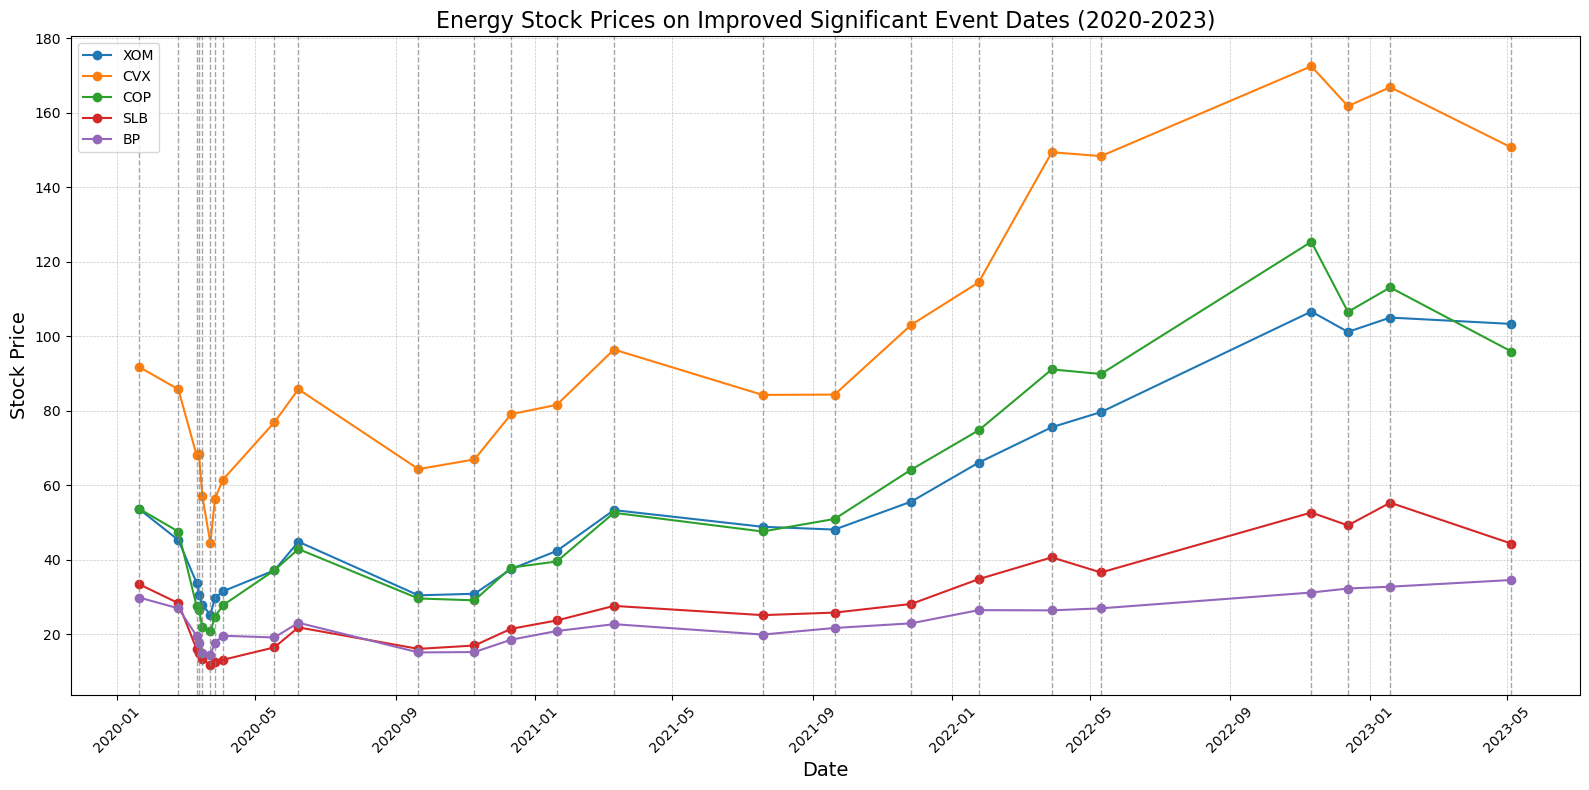

In [22]:
existing_energy_tickers = [ticker for ticker in energy_tickers if ticker in close_prices.columns]
energy_data = close_prices[existing_energy_tickers]

energy_data
improved_significant_dates = pd.to_datetime(["2020-01-21", "2020-02-24", "2020-03-11", "2020-03-13", "2020-03-16",
    "2020-03-23", "2020-03-27", "2020-04-03", "2020-05-18", "2020-06-08",
    "2020-09-21", "2020-11-09", "2020-12-11", "2021-01-20", "2021-03-11",
    "2021-07-19", "2021-09-20", "2021-11-26", "2022-01-24", "2022-03-29",
    "2022-05-11", "2022-11-11", "2022-12-13", "2023-01-19", "2023-05-05"])


energy_data.index = energy_data.index.date
improved_significant_dates = improved_significant_dates.date
print(energy_data.head())

# Filter energy data
filtered_energy_data_improved = energy_data.loc[energy_data.index.isin(improved_significant_dates)]
filtered_energy_data_improved.head()

# Plot the improved stock trends with selected dates
plt.figure(figsize=(16,8))
for stock in ["XOM", "CVX", "COP", "SLB", "BP"]:
    plt.plot(filtered_energy_data_improved.index, filtered_energy_data_improved[stock], marker='o', label=stock)

# Highlight improved significant dates
for date in improved_significant_dates:
    if date in filtered_energy_data_improved.index:
        plt.axvline(x=date, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Enhance plot aesthetics
plt.title('Energy Stock Prices on Improved Significant Event Dates (2020-2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# Understanding the Impact of the Ukraine-Russia War on Energy Stocks:

### Early COVID-19 Impact (2020):

####Initial Decline:
In early 2020, energy stocks experienced a sharp decline due to the onset of the COVID-19 pandemic. The pandemic led to a significant reduction in global demand for oil and energy as lockdowns and travel restrictions were implemented worldwide.

####Slow Recovery:
Stocks showed gradual recovery throughout 2020 and into 2021 as economies started to reopen and demand for energy began to normalize. However, energy stocks remained volatile, reflecting the ongoing uncertainty around the pandemic and periodic lockdowns.
### Before the Ukraine-Russia War (2020-2021):

#### General Economic Conditions:
During this period, energy stock prices fluctuated primarily due to COVID-19-related economic conditions. These changes were not directly connected to the Ukraine-Russia conflict but were influenced by pandemic recovery efforts, global supply chain challenges, and fluctuating oil demand.

### When the War Started (Early 2022):

#### Noticeable Increases:
Around February 2022, when the Ukraine-Russia war began, we see a clear spike in the stock prices of major energy companies like ExxonMobil (XOM), Chevron (CVX), and ConocoPhillips (COP). This makes sense because the war triggered concerns about disruptions to global oil supplies—Russia is a major player in the energy market.

#### Volatile Period:
After the initial invasion, energy stocks showed more pronounced movements, confirming that geopolitical tensions led to increased activity and price swings.

###Long-Term Effects (Mid-2022 to 2023):

#### Sustained Growth:
The price increases weren’t just short-lived. Stocks like XOM and CVX continued to rise through 2022 as the war progressed and sanctions on Russian oil came into effect. The continued worries about energy supplies and the global reshuffling of sourcing strategies kept these stocks elevated.

#### Different Levels of Impact:
While ExxonMobil, Chevron, and ConocoPhillips experienced significant gains, other companies like Schlumberger (SLB) and BP saw more moderate changes. This tells us that not all energy companies were affected in the same way—those more involved in oil production and global supply chains felt the impact more than those with different business models.

##Final Takeaway:
Yes, the Ukraine-Russia war and Covid-19 clearly influenced energy stocks, especially in early 2022. The marked increases in the prices of major energy companies align with the hypothesis that energy stocks react to ukraine-russia war. The war heightened concerns about oil and gas supplies, pushing up prices and leading to more market activity.Thereby we accept the hypothesis

### Hypothesis 3: Tech Sector is More Sensitive to Economic Conditions and Less to Geopolitical Events

#### Visualization: Tech Stock Prices (Stacked) Around Key Events
#### Plot

This plot presents the adjusted closing prices of major tech stocks (AAPL, MSFT, GOOGL, NVDA, META) over time in a stacked area format. Key events, including major geopolitical developments (such as Russia-Ukraine events) and significant COVID-related market impacts, are marked with vertical red dashed lines.

### Purpose

The purpose of this visualization is to explore how these tech stocks respond to economic and geopolitical events, particularly examining if they are more sensitive to economic conditions than to geopolitical disruptions.



C:\Users\zakk2\AppData\Local\Temp\ipykernel_33656\3631020984.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_data['Average_Tech_Price'] = tech_data.mean(axis=1)


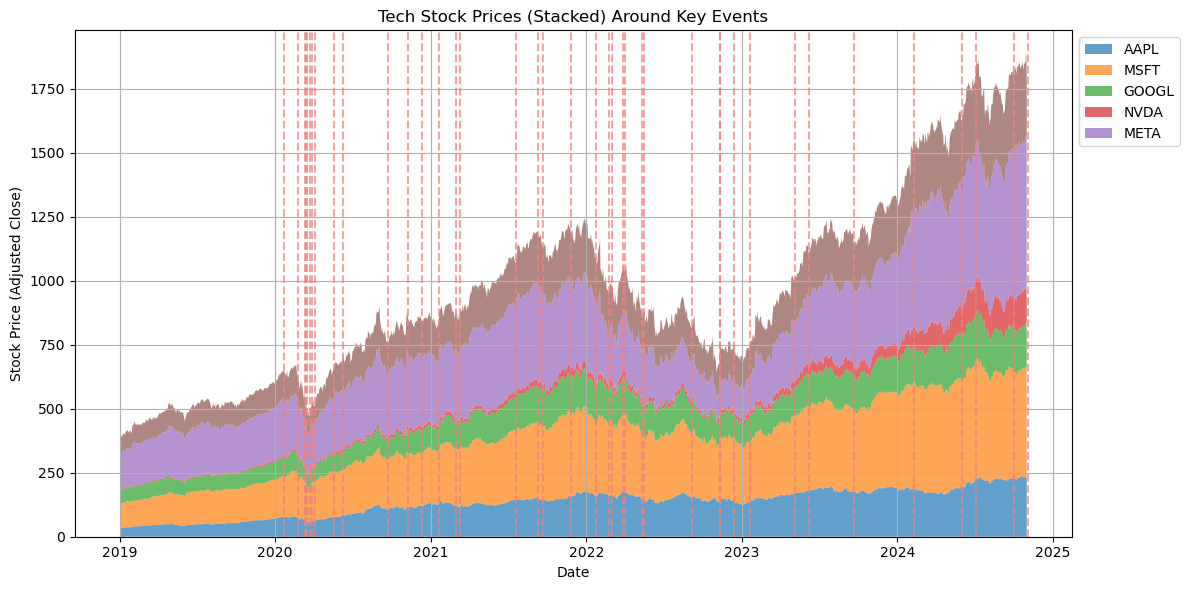

In [23]:
import pandas as pd

# Russia-Ukraine events dataset
events_ukraine = pd.DataFrame({
    "Date": [
        "2021-03-01", "2021-09-10", "2022-02-24", "2022-03-02", "2022-04-02",
        "2022-05-16", "2022-09-06", "2022-11-11", "2023-06-08", "2023-09-22",
        "2024-02-09", "2024-05-31", "2024-07-05", "2024-10-01", "2024-11-03"
    ],
    "Event": [
        "Russia builds up near Ukraine.", "Russia-Belarus military exercises.",
        "Russia invades.", "Russia takes Kherson.", "Ukraine retakes Bucha.",
        "Mariupol surrenders to Russia.", "Ukraine takes back Kharkiv.",
        "Russia leaves Kherson.", "Ukraine counteroffensive begins.",
        "Missile hits Sevastopol base.", "New military head in Ukraine.",
        "EU restricts Russian grain.", "Russian attacks on civilians.",
        "Putin promotes Dyumin.", "Ukraine stops Russian offensive."
    ]
})

# COVID market impact events dataset (correcting length mismatch)
covid_market_impact_updated_data = {
    "Date": [
        "2020-01-21", "2020-02-24", "2020-03-11", "2020-03-13", "2020-03-16",
        "2020-03-23", "2020-03-27", "2020-04-03", "2020-05-18", "2020-06-08",
        "2020-09-21", "2020-11-09", "2020-12-11", "2021-01-20", "2021-03-11",
        "2021-07-19", "2021-09-20", "2021-11-26", "2022-01-24", "2022-03-29",
        "2022-05-11", "2022-11-11", "2022-12-13", "2023-01-19", "2023-05-05"
    ],
    "Event": [
        "First U.S. COVID-19 case reported.", "U.S. stocks enter correction territory.",
        "WHO declares COVID-19 a pandemic.", "U.S. declares COVID-19 emergency.",
        "Dow drops nearly 3,000 points.", "Fed announces unlimited QE.",
        "Congress passes $2T relief bill.", "Record 6.6M jobless claims filed.",
        "Moderna reports positive vaccine results.", "Dow rises as states plan reopenings.",
        "Market drops on fears of a second wave.", "Pfizer reports vaccine effectiveness.",
        "FDA approves Pfizer vaccine.", "Biden takes office; markets react.",
        "Biden signs $1.9T relief package.", "Delta variant increases market volatility.",
        "Markets fall as Delta cases surge.", "Omicron identified, market drops.",
        "Markets react to Omicron, inflation.", "U.S. relaxes mask mandates.",
        "WHO says pandemic phase may end.", "Stocks rally as COVID cases stabilize.",
        "Markets fall on Fed's rate hike plans.", "U.S. relaxes COVID-19 restrictions.",
        "WHO says COVID-19 remains a concern."
    ]
}

covid_df = pd.DataFrame(covid_market_impact_updated_data)

eventss = pd.concat([events_ukraine, covid_df], ignore_index=True)


existing_tech_tickers = [ticker for ticker in tech_tickers if ticker in close_prices.columns]

# Extract data for the tech sector from the 'close_prices' DataFrame
tech_data = close_prices[existing_tech_tickers]

import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Date' column in events is in datetime format
eventss['Date'] = pd.to_datetime(eventss['Date'])

# Calculate the average stock price across all tech stocks for each day
tech_data['Average_Tech_Price'] = tech_data.mean(axis=1)

plt.figure(figsize=(12, 6))

# Plot a stacked area plot for tech stocks
plt.stackplot(tech_data.index, tech_data.T, labels=existing_tech_tickers, alpha=0.7)

# Mark events on the plot with vertical lines and annotations
for _, event in eventss.iterrows():
    plt.axvline(event['Date'], color='lightcoral', linestyle='--', alpha=0.7)

plt.title('Tech Stock Prices (Stacked) Around Key Events')
plt.xlabel('Date')
plt.ylabel('Stock Price (Adjusted Close)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

- **Economic Sensitivity**: Significant drops in tech stock prices are visible around key economic events, especially during COVID market impacts and periods of high inflation or interest rate adjustments. This indicates that tech stocks are sensitive to changes in broader economic conditions and financial stability.

- **Geopolitical Resilience**: Despite several marked geopolitical events, particularly related to the Russia-Ukraine conflict, tech stocks do not show sustained drops or slowdowns. Any impact from these events appears short-lived, with prices generally rebounding quickly, suggesting limited long-term influence from geopolitical instability.

- **Overall Growth and Resilience**: Even amid various pressures, tech stocks maintain a strong upward trend. This long-term growth reflects the sector's resilience and investor confidence, likely due to ongoing innovation and strong demand for tech products and services.

### Conclusion

Based on these observations, we can **accept Hypothesis 3**: tech stocks appear to be more sensitive to economic conditions than to geopolitical events. This conclusion suggests that tech sector performance is more closely tied to economic stability and investor sentiment around financial indicators than to geopolitical shocks.

## Volatility Analysis: A Machine Learning Approach

Here, we manually calculate the volatility as the rolling standard deviation of stock returns over a rolling window chosen as per our needs (A larger window smoothens our graph and vice-versa). We then use an ensemble ML model called an Isolation Forest to detect the anomalies in the volatility of our selected stocks. We filter the anomalies for only periods of high volatility, and visualise these instances/dates of high volatility across the time period spanning both COVID and the Russia-Ukraine War.

We analyse the impact across each sector as well as the major indices.


[*********************100%***********************]  3 of 3 completed


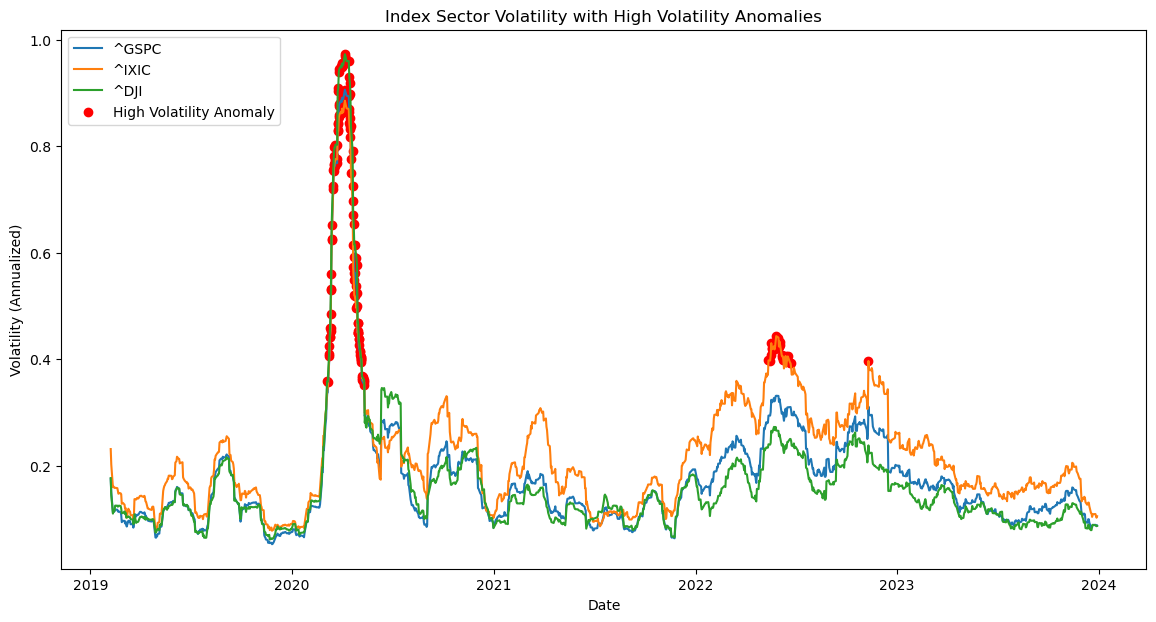

[*********************100%***********************]  4 of 4 completed


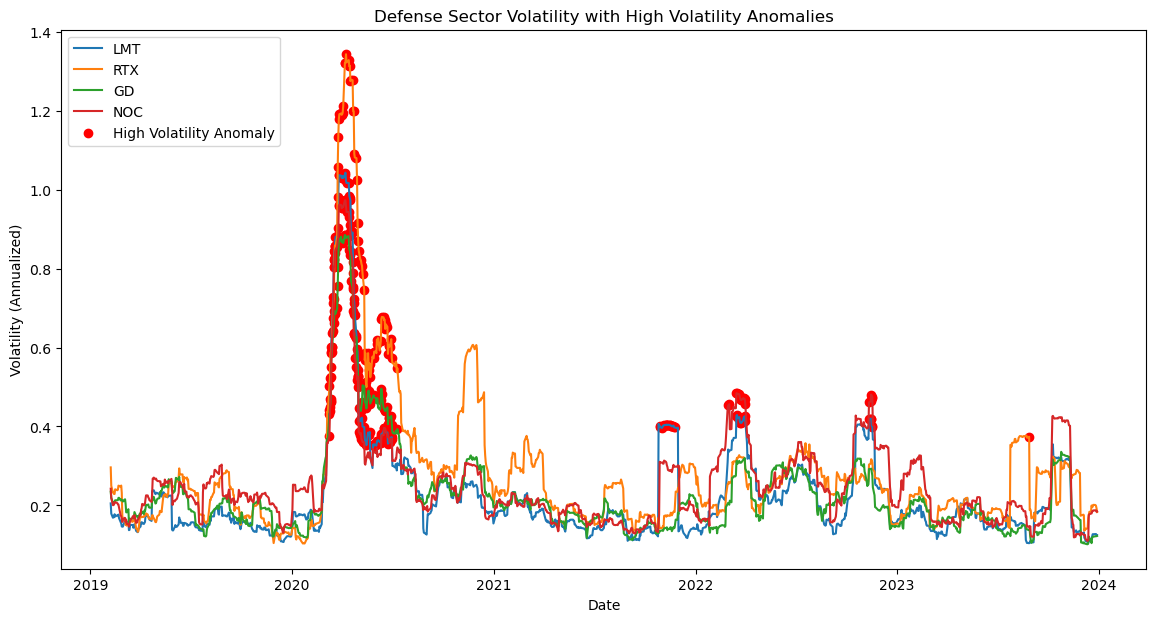

[*********************100%***********************]  5 of 5 completed


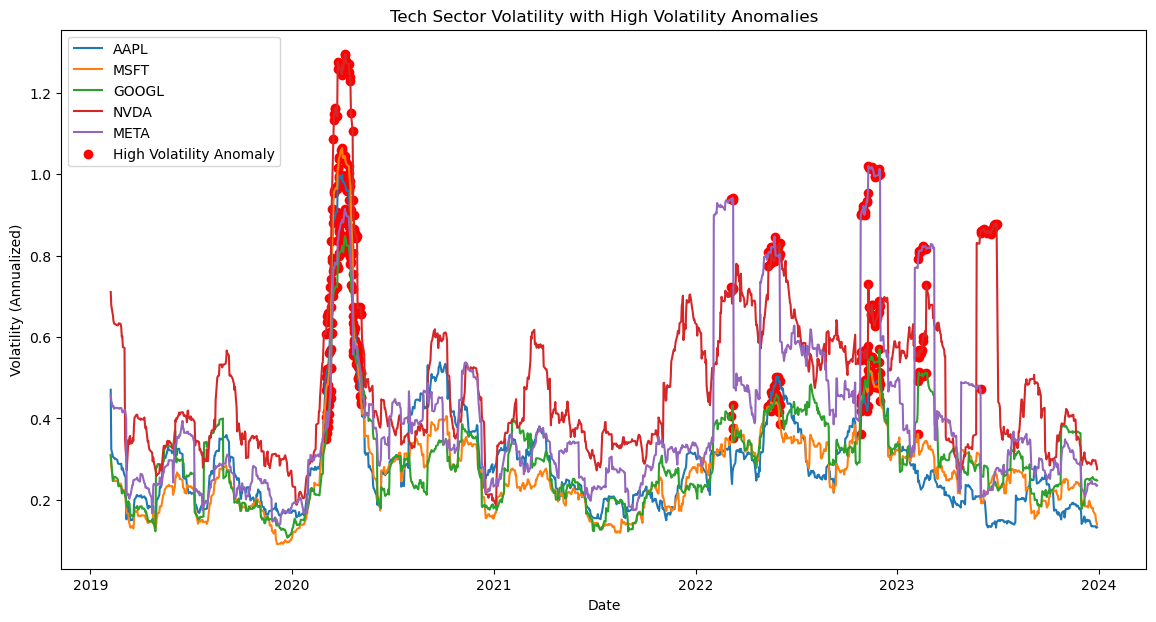

[*********************100%***********************]  5 of 5 completed


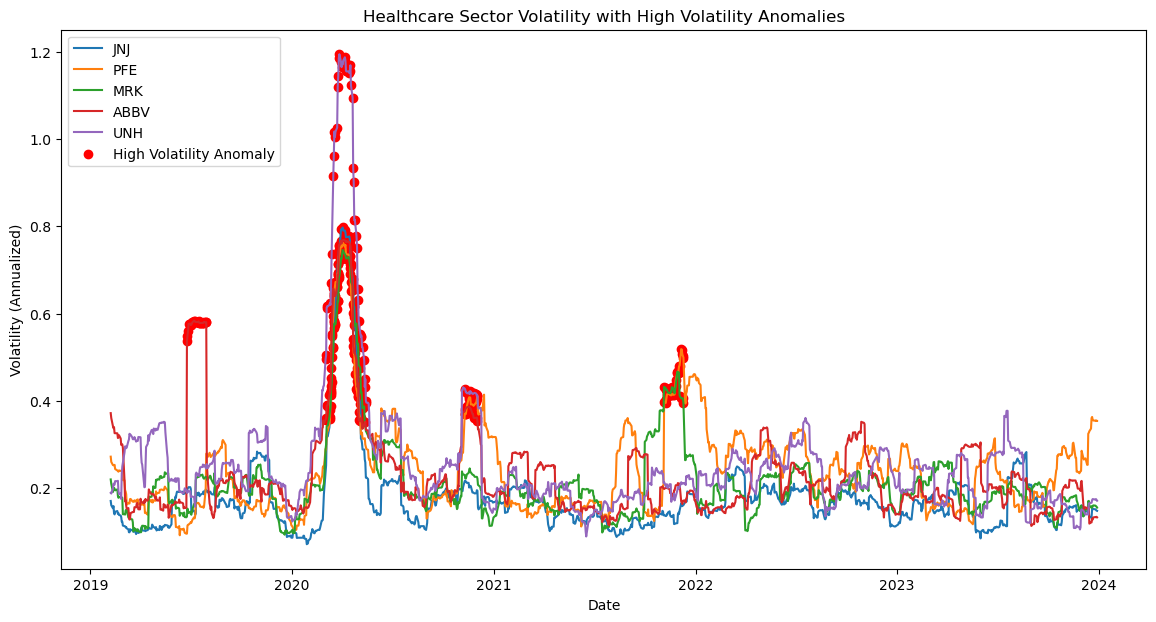

[*********************100%***********************]  5 of 5 completed


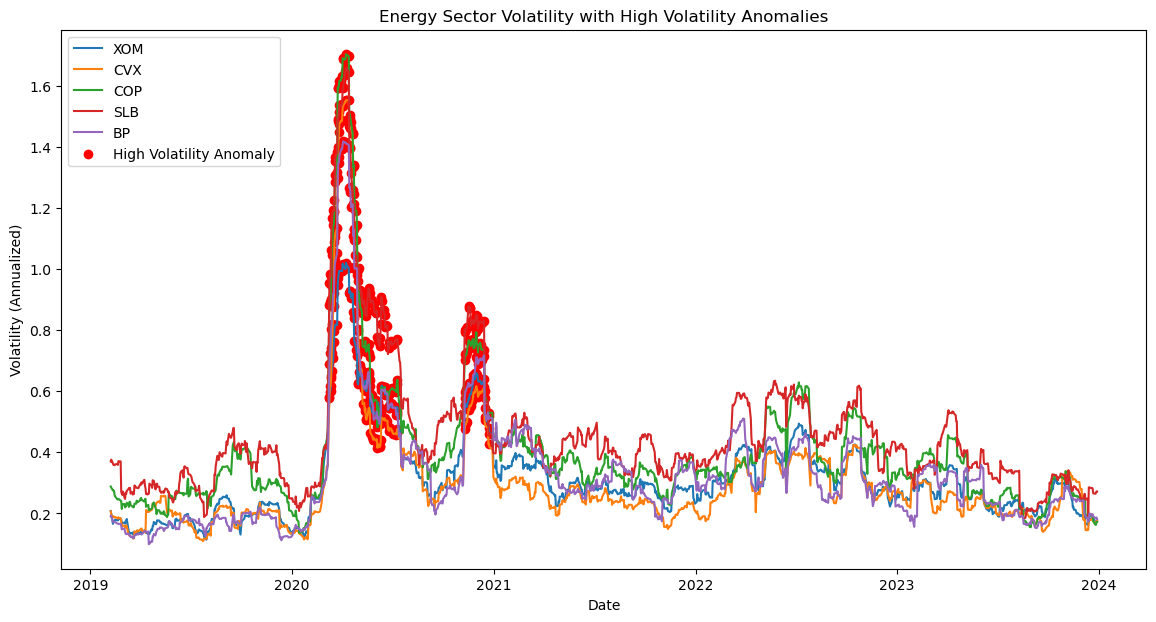


High Volatility Anomalies for Index Sector:


,Date,^DJI,^GSPC,^IXIC
0,2020-03-05 00:00:00+00:00,0.358381,0.335557,0.342052
1,2020-03-06 00:00:00+00:00,0.357920,0.337826,0.345591
2,2020-03-09 00:00:00+00:00,0.425281,0.406706,0.409362
3,2020-03-10 00:00:00+00:00,0.459160,0.441724,0.441459
4,2020-03-11 00:00:00+00:00,0.485083,0.458500,0.453914
...,...,...,...,...
67,2022-06-16 00:00:00+00:00,0.244508,0.309334,0.401822
68,2022-06-17 00:00:00+00:00,0.244512,0.309692,0.405200
69,2022-06-21 00:00:00+00:00,0.250316,0.310241,0.393633
70,2022-06-22 00:00:00+00:00,0.250147,0.310223,0.392306



High Volatility Anomalies for Defense Sector:


,Date,GD,LMT,NOC,RTX
0,2020-03-09 00:00:00+00:00,0.432201,0.440920,0.376454,0.502894
1,2020-03-10 00:00:00+00:00,0.450003,0.468607,0.438947,0.522025
2,2020-03-11 00:00:00+00:00,0.460987,0.468450,0.464779,0.587189
3,2020-03-12 00:00:00+00:00,0.551128,0.601340,0.525857,0.587513
4,2020-03-13 00:00:00+00:00,0.588297,0.635650,0.600313,0.601083
...,...,...,...,...,...
113,2022-11-14 00:00:00+00:00,0.292149,0.419440,0.463379,0.305783
114,2022-11-15 00:00:00+00:00,0.293201,0.419797,0.480638,0.317075
115,2022-11-16 00:00:00+00:00,0.285001,0.400935,0.471360,0.314205
116,2022-11-17 00:00:00+00:00,0.275675,0.398737,0.475471,0.309103



High Volatility Anomalies for Tech Sector:


,Date,AAPL,GOOGL,META,MSFT,NVDA
0,2020-03-03 00:00:00+00:00,0.502289,0.350111,0.404367,0.468837,0.608038
1,2020-03-04 00:00:00+00:00,0.516841,0.364599,0.417098,0.478978,0.637040
2,2020-03-05 00:00:00+00:00,0.520468,0.392790,0.415249,0.484035,0.651689
3,2020-03-06 00:00:00+00:00,0.521342,0.394162,0.378430,0.482851,0.659339
4,2020-03-09 00:00:00+00:00,0.559873,0.433451,0.410847,0.524919,0.696462
...,...,...,...,...,...,...
112,2023-06-26 00:00:00+00:00,0.142010,0.245233,0.258553,0.263596,0.875764
113,2023-06-27 00:00:00+00:00,0.147500,0.245255,0.268905,0.268804,0.873970
114,2023-06-28 00:00:00+00:00,0.145212,0.242844,0.271329,0.267937,0.878233
115,2023-06-29 00:00:00+00:00,0.131879,0.236529,0.275346,0.259857,0.875793



High Volatility Anomalies for Healthcare Sector:


,Date,ABBV,JNJ,MRK,PFE,UNH
0,2019-06-25 00:00:00+00:00,0.536329,0.189535,0.134569,0.095360,0.188971
1,2019-06-26 00:00:00+00:00,0.549298,0.198172,0.152649,0.113963,0.189495
2,2019-06-27 00:00:00+00:00,0.559057,0.200152,0.142910,0.115746,0.193551
3,2019-06-28 00:00:00+00:00,0.576488,0.201841,0.142935,0.116018,0.192476
4,2019-07-01 00:00:00+00:00,0.576980,0.201844,0.145799,0.119483,0.192561
...,...,...,...,...,...,...
115,2021-12-06 00:00:00+00:00,0.168489,0.165011,0.405440,0.518469,0.213228
116,2021-12-07 00:00:00+00:00,0.168483,0.165159,0.406045,0.517576,0.210214
117,2021-12-08 00:00:00+00:00,0.163243,0.158389,0.405743,0.506896,0.210721
118,2021-12-09 00:00:00+00:00,0.170493,0.160800,0.405664,0.503169,0.209739



High Volatility Anomalies for Energy Sector:


,Date,BP,COP,CVX,SLB,XOM
0,2020-03-09 00:00:00+00:00,0.689814,0.884206,0.582297,0.956527,0.576771
1,2020-03-10 00:00:00+00:00,0.725266,0.893870,0.616325,0.983199,0.598620
2,2020-03-11 00:00:00+00:00,0.742294,0.902894,0.616591,0.976834,0.602280
3,2020-03-12 00:00:00+00:00,0.805766,0.949281,0.642440,1.064374,0.650822
4,2020-03-13 00:00:00+00:00,0.819936,1.046466,0.727185,1.169043,0.665929
...,...,...,...,...,...,...
107,2020-12-10 00:00:00+00:00,0.701683,0.736141,0.598571,0.828186,0.623684
108,2020-12-11 00:00:00+00:00,0.707709,0.737351,0.602135,0.823366,0.624493
109,2020-12-14 00:00:00+00:00,0.717222,0.734676,0.613199,0.830925,0.639159
110,2020-12-15 00:00:00+00:00,0.544161,0.601438,0.504788,0.577510,0.515882


In [ ]:
from sklearn.ensemble import IsolationForest


ticker_groups = {
    "Index": ["^GSPC", "^IXIC", "^DJI"],
    "Defense": ["LMT", "RTX", "GD", "NOC"],
    "Tech": ["AAPL", "MSFT", "GOOGL", "NVDA", "META"],
    "Healthcare": ["JNJ", "PFE", "MRK", "ABBV", "UNH"],
    "Energy": ["XOM", "CVX", "COP", "SLB", "BP"]
}

#Independent Variables
start_date = '2019-01-01' 
end_date = '2023-12-31' 

contamination_rate = 0.1  
volatility_threshold = 0.35 


anomalies_dict = {}

for sector, tickers in ticker_groups.items():
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    returns = data.pct_change().dropna()

    # Calculate annualized volatility (rolling standard deviation of returns)
    volatility = returns.rolling(window=25).std() * np.sqrt(252) 
    volatility = volatility.dropna()

    isolation_forest = IsolationForest(contamination=contamination_rate, random_state=42)

    volatility_values = volatility.values
    isolation_forest.fit(volatility_values)

    # Dependent Variable
    # Predicting anomalies (-1 for anomalies, 1 for normal)
    volatility['Anomaly'] = isolation_forest.predict(volatility_values)

    # Filter only high-volatility anomalies based on threshold
    high_volatility_anomalies = volatility[(volatility['Anomaly'] == -1) & (volatility[tickers] > volatility_threshold).any(axis=1)]
    high_volatility_anomalies = high_volatility_anomalies.drop(columns='Anomaly')  # Drop 'Anomaly' column

   
    anomalies_df = high_volatility_anomalies.reset_index()
    anomalies_df.columns = ['Date'] + list(high_volatility_anomalies.columns)  
    anomalies_dict[sector] = anomalies_df

    plt.figure(figsize=(14, 7))
    for ticker in tickers:
        plt.plot(volatility.index, volatility[ticker], label=ticker)

    # Highlight only high-volatility anomalies above the threshold
    for ticker in tickers:
        high_anomaly_points = high_volatility_anomalies[high_volatility_anomalies[ticker] > volatility_threshold]
        plt.scatter(high_anomaly_points.index, high_anomaly_points[ticker], color='red', label='High Volatility Anomaly' if ticker == tickers[0] else "")

    plt.title(f"{sector} Sector Volatility with High Volatility Anomalies")
    plt.xlabel("Date")
    plt.ylabel("Volatility (Annualized)")
    plt.legend(loc="upper left")
    plt.show()

for sector, anomalies_df in anomalies_dict.items():
    print(f"\nHigh Volatility Anomalies for {sector} Sector:")
    display(anomalies_df)


### Interpretations of the volatility analysis:

 1. All sectors and consequently, indices experienced the highest spike in volatility in early 2020, when COVID began to affect the country and lockdowns took effect.
 2. The second wave of COVID in late 2020 impacted the energy sector hardest followed by healthcare and Tech and lastly, Defense was not affected as a whole.
 3. The period of the Ukraine war correlates with massive volatility in the Tech sector, moderate volatility in Defense, low in Energy and negligible in healthcare.
 4. The markets in general had delayed reactions to the war, but immediate reactions to COVID.
 5. COVID has had a much much greater impact on the markets across sectors than the war, especially the first wave.

NOTE: While the analysis reveals the coincidence of COVID and the war to periods of volatility, it should be noted that this does not necessarily imply causation. Sometimes the impact is stark and unmistakable, but sometimes not. This is why we use multiple companies across sectors, and furthermore, indices that account for all sectors, to account for any noise added by other factors affecting individual companies or sectors. Thus we can reasonably and cautiously relate these fluctuations with the events of COVID and the war.

## Credits/Roles/Coordination:

Cleaning and EDA: Devarshi Dhola

Hypotheses formation and testing: Shriraksha B Srinivas, Apoorva Vutukur, Sanjana Uppalike

Volatility Analysis: Prajwal Vishwanath, Varun P Shrivathsa

## Reflection

The project has yielded significant progress and insights. Our initial analyses have shown us that COVID and the Russia-Ukraine War did indeed have varying impacts on the stock prices across sectors, impacting sectors differently and also as a whole. The scope of the project is set. The most challenging aspect of the project was coming up with and testing the different hypotheses, and fine-tuning the visualizations and the volatility model.  

## Next Steps

Going forward, we would like to streamline the implementations, create a visualization platform via Streamlit, and organize the insights into a more cohesive and meaningful narrative.